<a href="https://colab.research.google.com/github/nezuk00/example/blob/main/Lab_report5_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

### Факультет искусственного интеллекта    

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Инструменты обработки и визуализации данных

##### Студент:  Голицын Тимофей Дмитриевич
##### Группа:   ЗПИбд-01-24

## Москва 2025
***

### Вариант № 15


Auto-Mpg Data Set
Название файла: auto-mpg.data
Ссылка: http://archive.ics.uci.edu/ml/datasets/Auto+MPG
Первый признак: mpg (столбец No 1)
Второй признак: horsepower (столбец No 4)
Третий признак: acceleration (столбец No 6)
Класс: cylinders (столбец No 2)

1. Считывание данных

In [ ]:
# 1. Считывание данных из набора данных репозитария UCI
print("1. Считывание данных из набора Abalone Data Set")

# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Заголовки столбцов согласно описанию набора данных
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# URL набора данных
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Чтение данных
df = pd.read_csv(url, header=None, names=column_names)

print(f"Размер исходного набора данных: {df.shape}")
print("\nПервые 5 строк данных:")
print(df.head())
print(f"\nМетки класса (Sex): {df['Sex'].unique()}")
print(f"Выбранные признаки: Length, Diameter, Height")

1. Считывание данных из набора Abalone Data Set
Размер исходного набора данных: (4177, 9)

Первые 5 строк данных:
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Метки класса (Sex): ['M' 'F' 'I']
Выбранные признаки: Length, Diameter, Height


2. Обработка пропущенных значений и выбросов

In [ ]:
# 2. Обработка пропущенных значений и выбросов
print("\n2. Обработка пропущенных значений и выбросов")

# Проверка пропущенных значений в метках класса
missing_class = df['Sex'].isnull().sum()
print(f"Пропущенные значения в метках класса: {missing_class}")

# Удаление записей с пропущенными метками класса (если есть)
if missing_class > 0:
    df = df.dropna(subset=['Sex'])
    print(f"Удалено записей с пропущенными метками класса: {missing_class}")

# Проверка пропущенных значений в признаках
missing_features = df[['Length', 'Diameter', 'Height']].isnull().sum()
total_missing = missing_features.sum()
total_records = len(df)
missing_percentage = (total_missing / (total_records * 3)) * 100

print(f"Пропущенные значения в признаках:")
print(missing_features)
print(f"Общий процент записей с пропущенными значениями: {missing_percentage:.2f}%")

# Замена пропущенных значений на медиану класса (если есть пропуски)
if total_missing > 0:
    for feature in ['Length', 'Diameter', 'Height']:
        for sex in df['Sex'].unique():
            mask = (df['Sex'] == sex) & (df[feature].isnull())
            median_value = df[df['Sex'] == sex][feature].median()
            df.loc[mask, feature] = median_value
    print("Пропущенные значения заменены на медиану класса")
else:
    # Удаление выбросов если нет пропущенных значений
    print("Пропущенных значений нет. Удаление выбросов...")

    # Вычисление Z-score для всех признаков
    z_scores = np.abs(stats.zscore(df[['Length', 'Diameter', 'Height']]))

    # Определение выбросов (Z-score > 3)
    outliers = (z_scores > 3).any(axis=1)
    outliers_count = outliers.sum()
    outliers_percentage = (outliers_count / len(df)) * 100

    print(f"Обнаружено выбросов: {outliers_count} ({outliers_percentage:.2f}%")

    # Если выбросов меньше 5%, удаляем дополнительные точки
    if outliers_percentage < 5:
        additional_to_remove = int(0.05 * len(df)) - outliers_count
        if additional_to_remove > 0:
            # Находим точки с наибольшими Z-score
            max_z_scores = pd.Series(z_scores.max(axis=1)) # Convert to Series to use nlargest
            additional_outliers = max_z_scores.nlargest(additional_to_remove).index
            outliers = outliers | df.index.isin(additional_outliers)

    # Удаление выбросов
    df_clean = df[~outliers]
    removed_percentage = ((len(df) - len(df_clean)) / len(df)) * 100

    print(f"Удалено точек: {len(df) - len(df_clean)} ({removed_percentage:.2f}%")
    df = df_clean

print(f"Размер набора данных после обработки: {df.shape}")


2. Обработка пропущенных значений и выбросов
Пропущенные значения в метках класса: 0
Пропущенные значения в признаках:
Length      0
Diameter    0
Height      0
dtype: int64
Общий процент записей с пропущенными значениями: 0.00%
Пропущенных значений нет. Удаление выбросов...
Обнаружено выбросов: 21 (0.50%
Удалено точек: 187 (4.48%
Размер набора данных после обработки: (3990, 9)


3. Построение гистограммы


3. Построение гистограммы
Дисперсии признаков:
Length      0.011155
Diameter    0.007696
Height      0.001187
dtype: float64
Признак с наименьшей дисперсией: Height
Признак с наибольшей дисперсией: Length


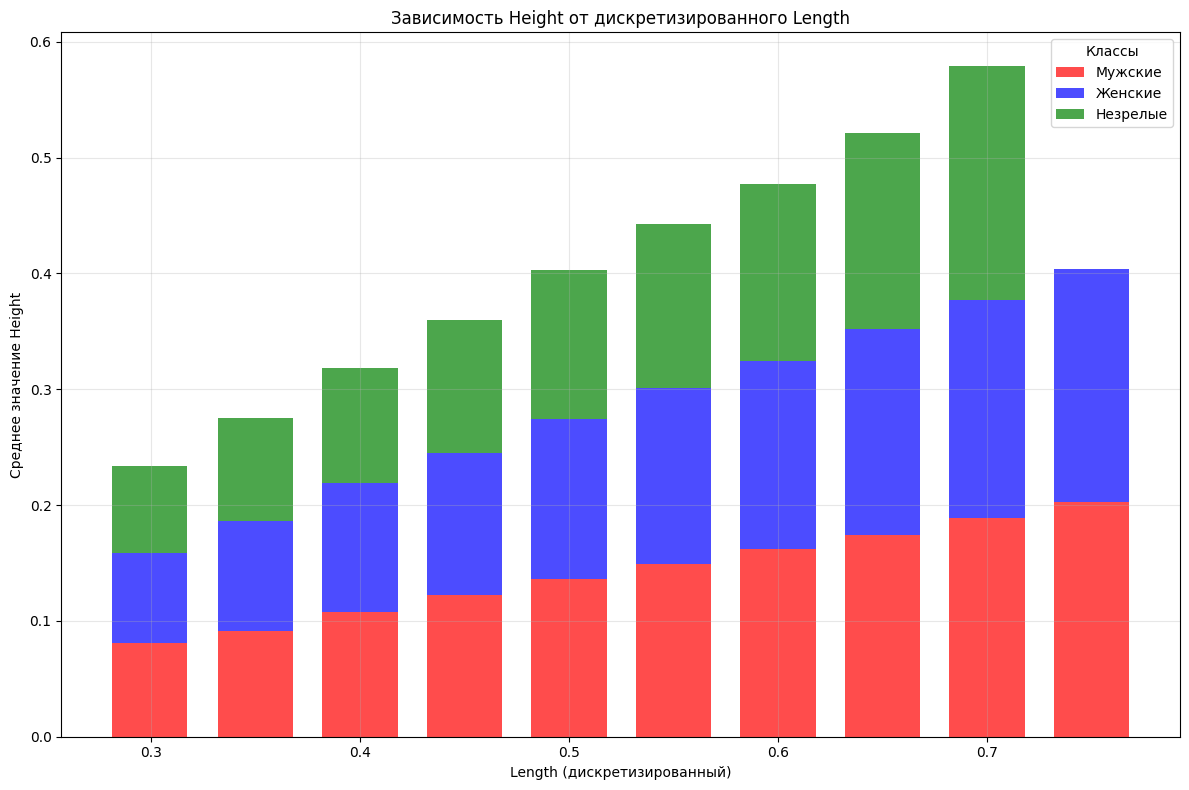

In [ ]:
# 3. Построение гистограммы зависимости признака с наименьшей дисперсией от дискретизированного признака с наибольшей дисперсией
print("\n3. Построение гистограммы")

# Вычисление дисперсии признаков
variances = df[['Length', 'Diameter', 'Height']].var()
print(f"Дисперсии признаков:")
print(variances)

# Определение признаков с наибольшей и наименьшей дисперсией
min_var_feature = variances.idxmin()
max_var_feature = variances.idxmax()

print(f"Признак с наименьшей дисперсией: {min_var_feature}")
print(f"Признак с наибольшей дисперсией: {max_var_feature}")

plt.figure(figsize=(12, 8))

# Дискретизация признака с наибольшей дисперсией
num_bins = 10
df_discrete = df.copy()
df_discrete[f'{max_var_feature}_bins'] = pd.cut(df_discrete[max_var_feature], bins=num_bins)

# Создание гистограммы
unique_classes = df['Sex'].unique()
colors = ['red', 'blue', 'green']
class_labels = {'M': 'Мужские', 'F': 'Женские', 'I': 'Незрелые'}

# Подготовка данных для гистограммы
bin_centers = []
class_means = {cls: [] for cls in unique_classes}

for i, bin_range in enumerate(df_discrete[f'{max_var_feature}_bins'].cat.categories):
    bin_data = df_discrete[df_discrete[f'{max_var_feature}_bins'] == bin_range]
    bin_center = (bin_range.left + bin_range.right) / 2
    bin_centers.append(bin_center)

    for cls in unique_classes:
        cls_data = bin_data[bin_data['Sex'] == cls][min_var_feature]
        class_means[cls].append(cls_data.mean() if not cls_data.empty else 0)

# Построение stacked bar chart
bottom = np.zeros(len(bin_centers))
for i, cls in enumerate(unique_classes):
    plt.bar(bin_centers, class_means[cls], width=(max(bin_centers)-min(bin_centers))/num_bins*0.8,
            bottom=bottom, label=class_labels[cls], color=colors[i], alpha=0.7)
    bottom += np.array(class_means[cls])

plt.xlabel(f'{max_var_feature} (дискретизированный)')
plt.ylabel(f'Среднее значение {min_var_feature}')
plt.title(f'Зависимость {min_var_feature} от дискретизированного {max_var_feature}')
plt.legend(title='Классы')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Построение расходящейся диаграммы леденцы с маркерами


4. Построение расходящейся диаграммы леденцы с маркерами


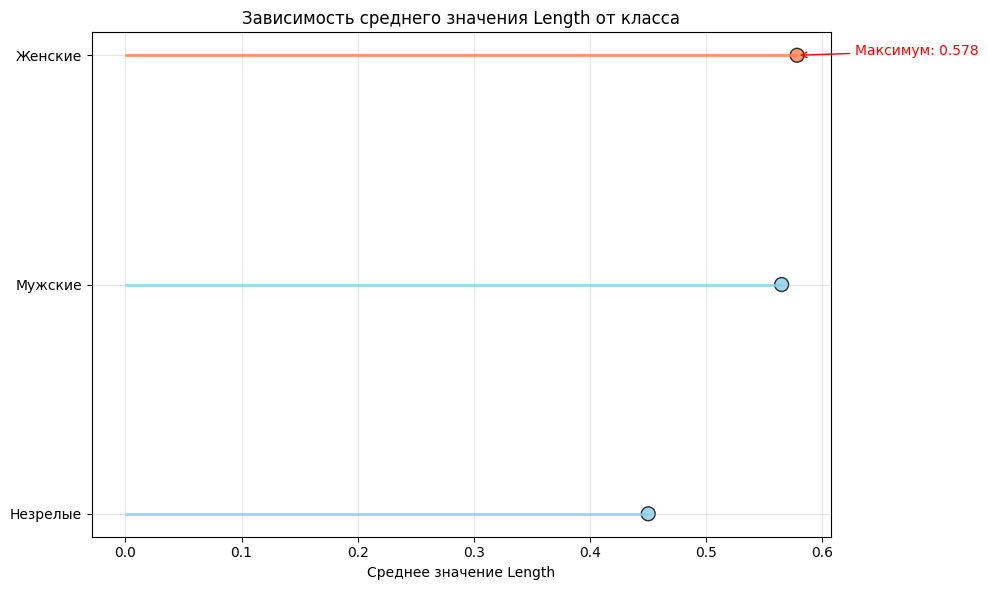

In [ ]:
# 4. Построение расходящейся диаграммы леденцы с маркерами
print("\n4. Построение расходящейся диаграммы леденцы с маркерами")

plt.figure(figsize=(10, 6))

# Вычисление средних значений для каждого класса
class_means = df.groupby('Sex')[max_var_feature].mean().sort_values()

# Создание расходящейся диаграммы
y_pos = range(len(class_means))
colors = ['skyblue' if x < class_means.max() else 'coral' for x in class_means]

plt.hlines(y=y_pos, xmin=0, xmax=class_means, color=colors, alpha=0.8, linewidth=2)
plt.scatter(class_means, y_pos, color=colors, s=100, alpha=0.8, edgecolors='black')

plt.yticks(y_pos, [class_labels[cls] for cls in class_means.index])
plt.xlabel(f'Среднее значение {max_var_feature}')
plt.title(f'Зависимость среднего значения {max_var_feature} от класса')
plt.grid(True, alpha=0.3)

# Аннотация для класса с наибольшим средним значением
max_class = class_means.idxmax()
max_value = class_means.max()
max_index = list(class_means.index).index(max_class)

plt.annotate(f'Максимум: {max_value:.3f}',
             xy=(max_value, max_index),
             xytext=(max_value + 0.05, max_index),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

5. Построение круговой диаграммы


5. Построение круговой диаграммы


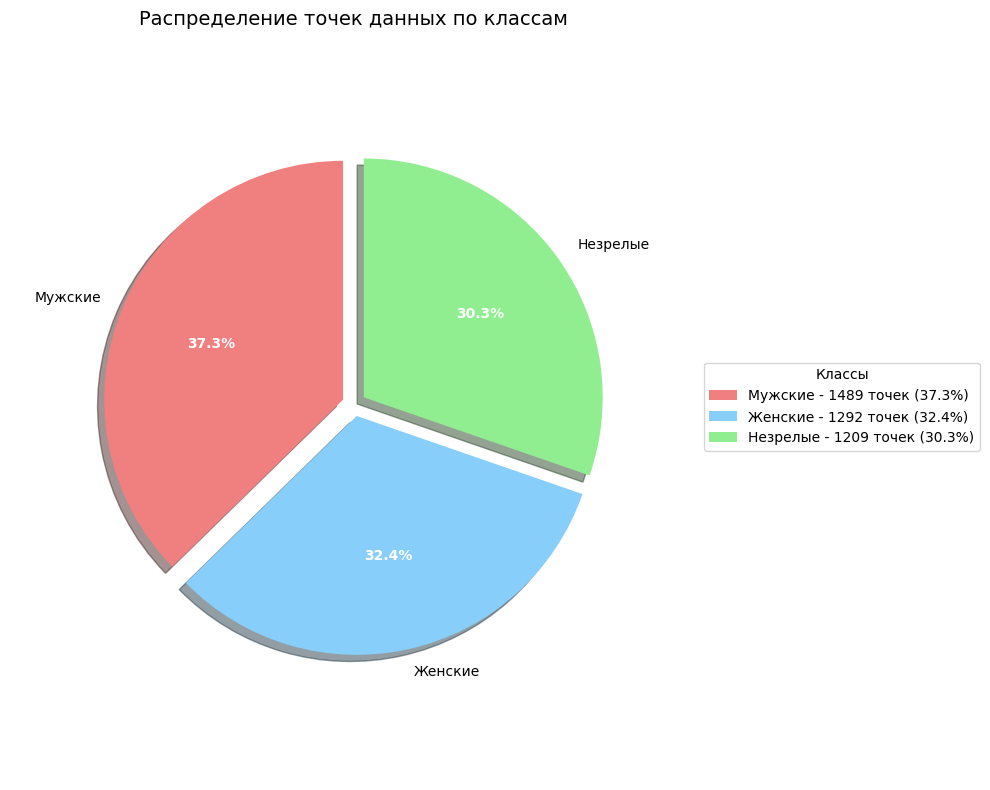

In [ ]:
# 5. Построение круговой диаграммы для количеств точек данных, принадлежащих разным классам
print("\n5. Построение круговой диаграммы")

plt.figure(figsize=(10, 8))

# Подсчет количества точек в каждом классе
class_counts = df['Sex'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Цвета для диаграммы
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.05, 0.05, 0.05)  # Выделение секторов

# Создание круговой диаграммы
wedges, texts, autotexts = plt.pie(class_counts,
                                   labels=[class_labels[cls] for cls in class_counts.index],
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   explode=explode,
                                   startangle=90,
                                   shadow=True)

# Улучшение отображения процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Распределение точек данных по классам', fontsize=14)
plt.axis('equal')  # Чтобы диаграмма была круглой

# Создание легенды с дополнительной информацией
legend_labels = [f'{class_labels[cls]} - {class_counts[cls]} точек ({class_percentages[cls]:.1f}%)'
                for cls in class_counts.index]
plt.legend(wedges, legend_labels, title="Классы", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

Построение пузырьковой диаграммы


6. Построение пузырьковой диаграммы
Два признака с наибольшей дисперсией: ['Length', 'Diameter']


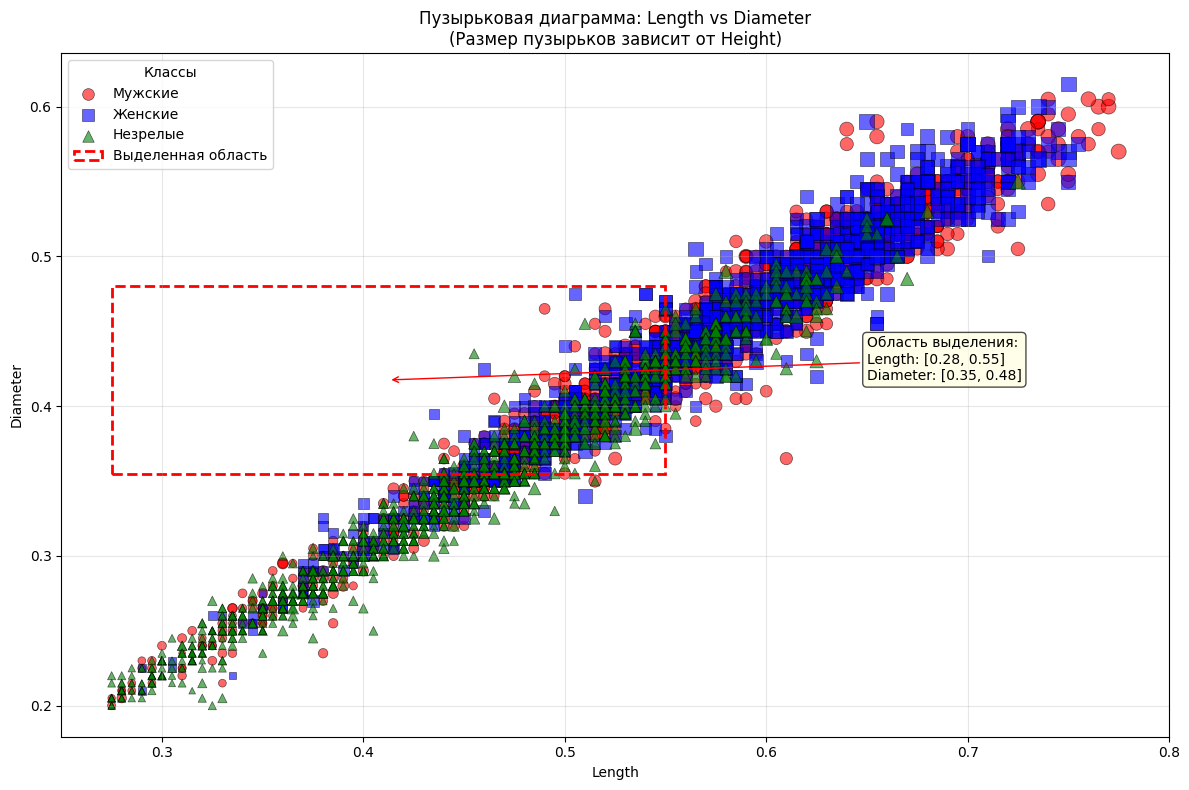

In [ ]:
# 6. Построение пузырьковой диаграммы
print("\n6. Построение пузырьковой диаграммы")

plt.figure(figsize=(12, 8))

# Определение двух признаков с большей дисперсией
top_two_features = variances.nlargest(2).index.tolist()
print(f"Два признака с наибольшей дисперсией: {top_two_features}")

# Маркеры для разных классов
markers = ['o', 's', '^']  # круг, квадрат, треугольник
colors = ['red', 'blue', 'green']
min_var_values = df[min_var_feature]

# Нормализация размеров пузырьков
bubble_sizes = (min_var_values - min_var_values.min()) / (min_var_values.max() - min_var_values.min()) * 100 + 20

# Построение пузырьковой диаграммы
for i, cls in enumerate(unique_classes):
    cls_data = df[df['Sex'] == cls]
    cls_sizes = bubble_sizes[df['Sex'] == cls]

    plt.scatter(cls_data[top_two_features[0]],
               cls_data[top_two_features[1]],
               s=cls_sizes,
               c=colors[i],
               marker=markers[i],
               alpha=0.6,
               label=class_labels[cls],
               edgecolors='black',
               linewidth=0.5)

# Выделение области: между минимумом и медианой для первого признака и между первым и третьим квартилями для второго признака
x_min = df[top_two_features[0]].min()
x_median = df[top_two_features[0]].median()

y_q1 = df[top_two_features[1]].quantile(0.25)
y_q3 = df[top_two_features[1]].quantile(0.75)

# Рисование прямоугольника для выделения области
highlight_rect = plt.Rectangle((x_min, y_q1),
                              x_median - x_min,
                              y_q3 - y_q1,
                              fill=False,
                              edgecolor='red',
                              linewidth=2,
                              linestyle='--',
                              label='Выделенная область')
plt.gca().add_patch(highlight_rect)

plt.xlabel(top_two_features[0])
plt.ylabel(top_two_features[1])
plt.title(f'Пузырьковая диаграмма: {top_two_features[0]} vs {top_two_features[1]}\n'
          f'(Размер пузырьков зависит от {min_var_feature})')
plt.legend(title='Классы')
plt.grid(True, alpha=0.3)

# Добавление аннотации для выделенной области
plt.annotate(f'Область выделения:\n{top_two_features[0]}: [{x_min:.2f}, {x_median:.2f}]\n'
            f'{top_two_features[1]}: [{y_q1:.2f}, {y_q3:.2f}]',
            xy=(x_min + (x_median - x_min)/2, y_q1 + (y_q3 - y_q1)/2),
            xytext=(x_median + 0.1, y_q1 + (y_q3 - y_q1)/2),
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))

plt.tight_layout()
plt.show()